In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
ticker = 'AMZN'
data = yf.download(ticker, period='10y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-21,182.649994,184.750000,180.580002,182.259995,182.259995,6756500
2012-02-22,181.949997,182.990005,180.289993,180.580002,180.580002,5785400
2012-02-23,179.639999,180.750000,176.960007,178.889999,178.889999,5153800
2012-02-24,179.699997,180.740005,178.369995,179.130005,179.130005,3668700
2012-02-27,177.539993,179.190002,176.500000,178.529999,178.529999,3706200
...,...,...,...,...,...,...
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4022000
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2848500
2022-02-16,3115.810059,3176.679932,3094.689941,3162.010010,3162.010010,2635200


In [4]:
# monthly volatility
stdev = data[['Adj Close']].groupby(pd.Grouper(freq='M')).apply(np.std)
stdev.rename(columns={'Adj Close':'stdev'}, inplace=True)
stdev

,stdev
Date,
2012-02-29,1.810488
2012-03-31,8.545052
2012-04-30,11.937859
2012-05-31,6.153252
2012-06-30,4.735498
...,...
2021-10-31,78.677845
2021-11-30,92.935651
2021-12-31,48.663648


In [5]:
df = stdev.join(data['Adj Close'].resample('M').last())
df 

,stdev,Adj Close
Date,,
2012-02-29,1.810488,179.690002
2012-03-31,8.545052,202.509995
2012-04-30,11.937859,231.899994
2012-05-31,6.153252,212.910004
2012-06-30,4.735498,228.350006
...,...,...
2021-10-31,78.677845,3372.429932
2021-11-30,92.935651,3507.070068
2021-12-31,48.663648,3334.340088


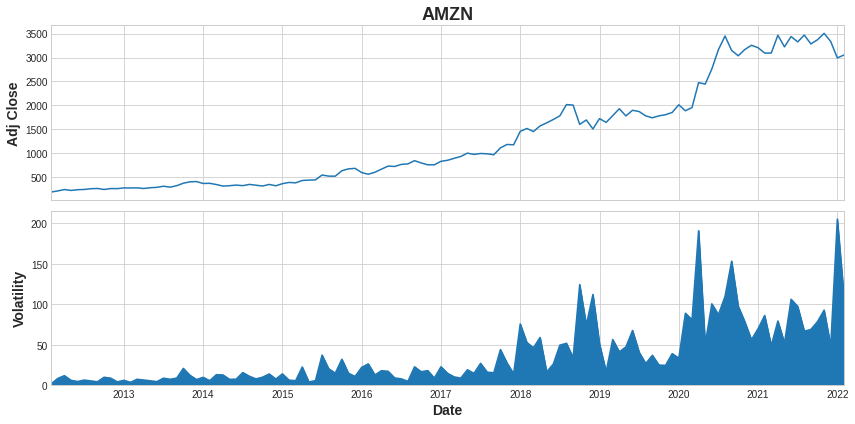

In [6]:
fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)
df['Adj Close'].plot(ax=ax[0], xlabel='')
ax[0].set_title(ticker, fontsize=18, fontweight='bold')
ax[0].set_ylabel('Adj Close', fontsize=14, fontweight='bold')
df['stdev'].plot(kind='area', ax=ax[1])
ax[1].set_ylabel('Volatility', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Date', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()